<a href="https://colab.research.google.com/github/JosenildoVicente/decisionTree_iris/blob/main/desicionTreeIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Upload de dataset

In [218]:
data = pd.read_csv( "https://raw.githubusercontent.com/JosenildoVicente/decisionTree_iris/main/iris.csv", encoding="ISO-8859-1" )

In [219]:
# data.head()

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       150 non-null    float64
 1   2       150 non-null    float64
 2   3       150 non-null    float64
 3   4       150 non-null    float64
 4   5       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Dividindo os dados em treino e teste:

In [221]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data.drop('5',axis=1),data['5'],test_size=0.3, stratify=data['5'])

In [222]:
X_treino.shape,X_teste.shape

((105, 4), (45, 4))

In [223]:
y_treino.shape,y_teste.shape

((105,), (45,))

In [225]:
# y_treino

# Treinamento

In [226]:
clf = DecisionTreeClassifier()

In [227]:
clf = clf.fit(X_treino,y_treino)


In [228]:
clf.feature_importances_

array([0.        , 0.01428571, 0.42727139, 0.5584429 ])

In [229]:
for feature,importancia in zip(data.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))


1:0.0
2:0.014285714285714284
3:0.4272713901285329
4:0.5584428955857528


In [230]:
resultado = clf.predict(X_teste)
# resultado

In [231]:
# print(metrics.classification_report(y_teste,resultado))


#Visualizando resultados

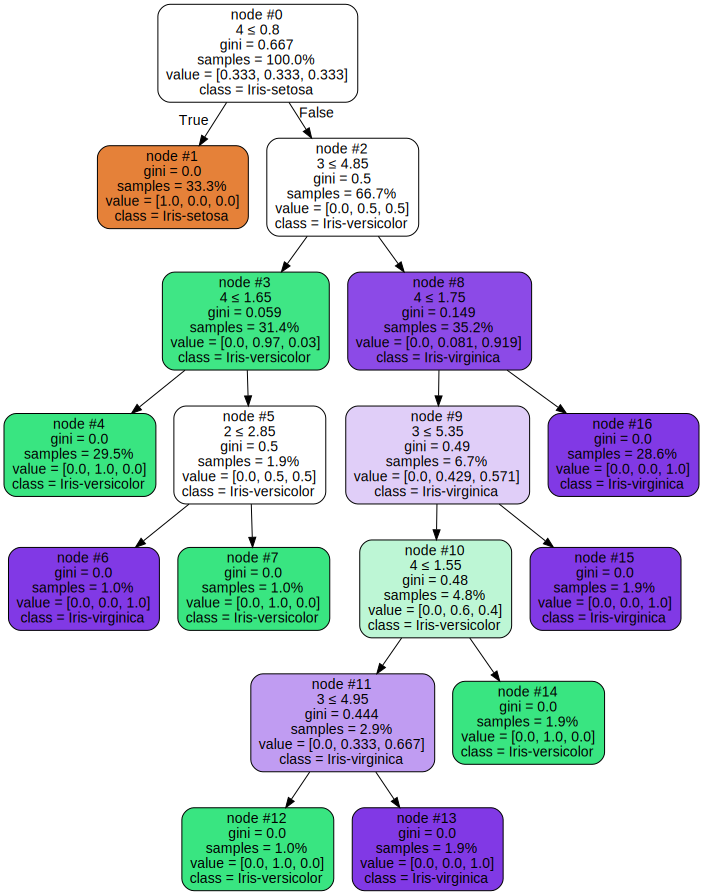

In [233]:
import pydot
import graphviz

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=data.drop('5',axis=1).columns,
         class_names=['Iris-setosa','Iris-versicolor', 'Iris-virginica'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph